In [43]:
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
from google.colab import files
import io
import numpy as np


In [3]:
uploaded = files.upload()

Saving test_Y3wMUE5_7gLdaTN.csv to test_Y3wMUE5_7gLdaTN.csv
Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i.csv


# Load the Datasets

In [44]:
#open datasets
dataset = pd.read_csv(io.BytesIO(uploaded['train_u6lujuX_CVtuZ9i.csv']))
#dataset_test = pd.read_csv(io.BytesIO(uploaded['test_Y3wMUE5_7gLdaTN.csv']))

dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Visualize the Data:

<ipython-input-6-4071d8b8a5c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_hist[x] = 'good'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


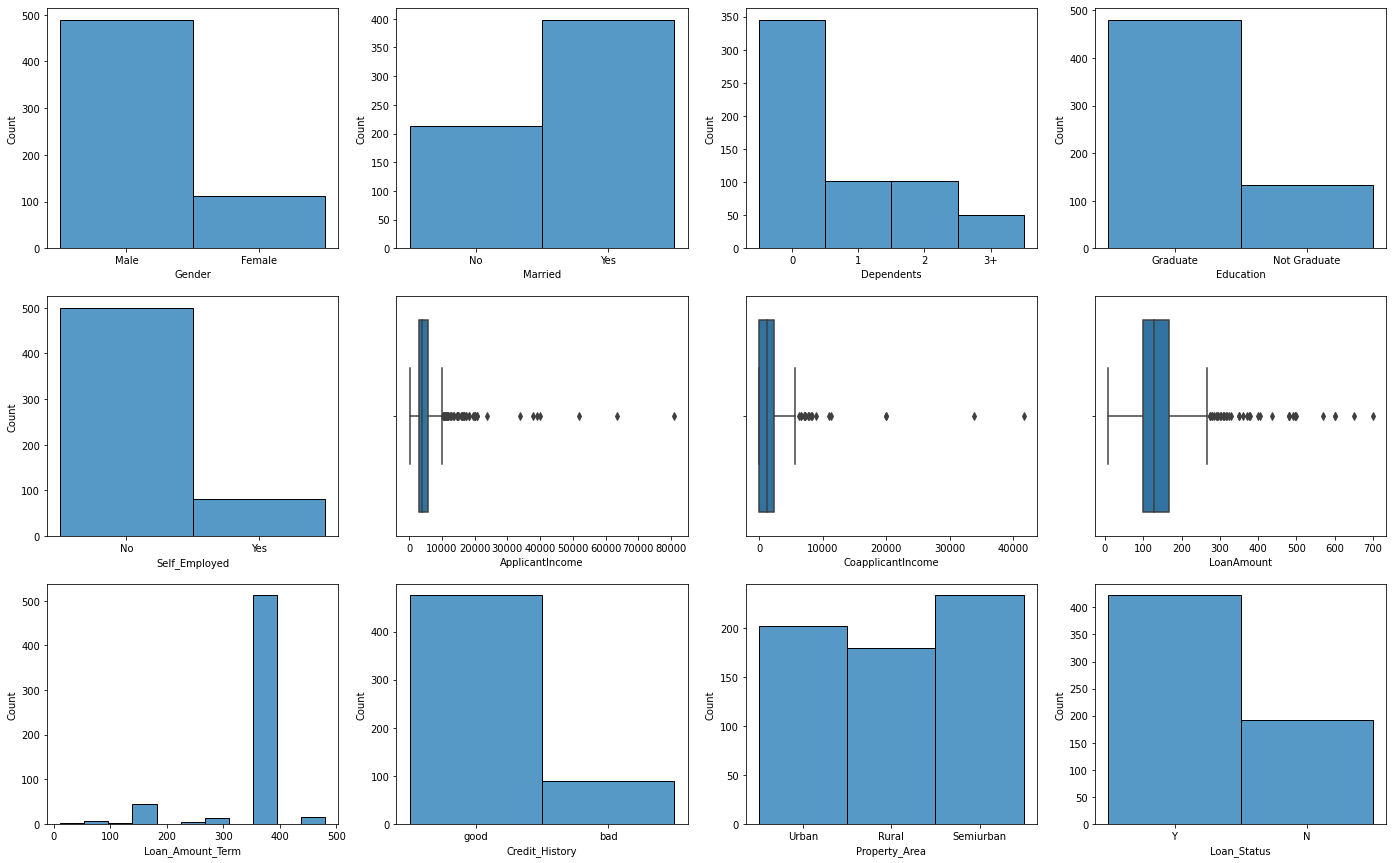

In [ ]:
credit_hist = dataset['Credit_History']

for x in range(len(credit_hist)):
  if credit_hist[x] == 1:
    credit_hist[x] = 'good'
  elif credit_hist[x] == 0:
    credit_hist[x] = 'bad'

#print(credit_hist)

fig, axes = plt.subplots(3,4, figsize=(24, 15))

seaborn.histplot(data=dataset, x='Gender', ax=axes[0, 0])
seaborn.histplot(data=dataset, x='Married', ax=axes[0,1])
seaborn.histplot(data=dataset, x='Dependents', ax=axes[0,2])
seaborn.histplot(data=dataset, x='Education', ax=axes[0,3])
seaborn.histplot(data=dataset, x='Self_Employed', ax=axes[1,0])
seaborn.boxplot(data=dataset, x='ApplicantIncome', ax=axes[1,1])
seaborn.boxplot(data=dataset, x='CoapplicantIncome', ax=axes[1,2])
seaborn.boxplot(data=dataset, x='LoanAmount', ax=axes[1,3])
seaborn.histplot(data=dataset, x='Loan_Amount_Term', ax=axes[2,0])
seaborn.histplot(data=credit_hist, ax=axes[2,1])
seaborn.histplot(data=dataset, x='Property_Area', ax=axes[2,2])
seaborn.histplot(data=dataset, x='Loan_Status', ax=axes[2,3])

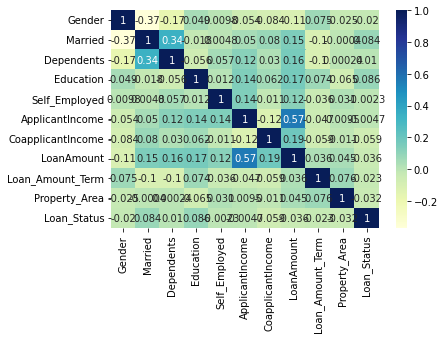

In [ ]:
dataplot = seaborn.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

# Preprocess Data

In [45]:
#convert all to numerical
dataset['Gender'] = dataset['Gender'].map({'Male':0, 'Female':1}, na_action='ignore')
dataset['Married'] = dataset['Married'].map({'Yes':1, 'No':0}, na_action='ignore')
dataset['Dependents'] = dataset['Dependents'].map({'0':0, '1':1, '2':2, '3+':3}, na_action='ignore')
dataset['Education'] = dataset['Education'].map({'Graduate':1, 'Not Graduate':0}, na_action='ignore')
dataset['Self_Employed'] = dataset['Self_Employed'].map({'Yes':1, 'No':0}, na_action='ignore')
dataset['Property_Area'] = dataset['Property_Area'].map({'Urban':0, 'Semiurban':1, 'Rural':2}, na_action='ignore')
dataset['Loan_Status'] = dataset['Loan_Status'].map({'Y':1, 'N':0}, na_action='ignore')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,LP001003,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,2,1
610,LP002979,0.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,2,1
611,LP002983,0.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,0,1
612,LP002984,0.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,0,1


In [46]:
#check for na values
dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
dataset_clean = dataset

#replace na in Married with 0
dataset_clean['Married'].fillna(0, inplace=True)

#replace na in dependents with 0
dataset_clean['Dependents'].fillna(0, inplace=True)

#replace loan amount with average
dataset_clean['LoanAmount'].fillna(dataset_clean['LoanAmount'].mean(), inplace=True)

#replace loan term wiht median
dataset_clean['Loan_Amount_Term'].fillna(dataset_clean['Loan_Amount_Term'].median(), inplace=True)

#remove all rest
dataset_clean = dataset_clean.dropna()

dataset_clean.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

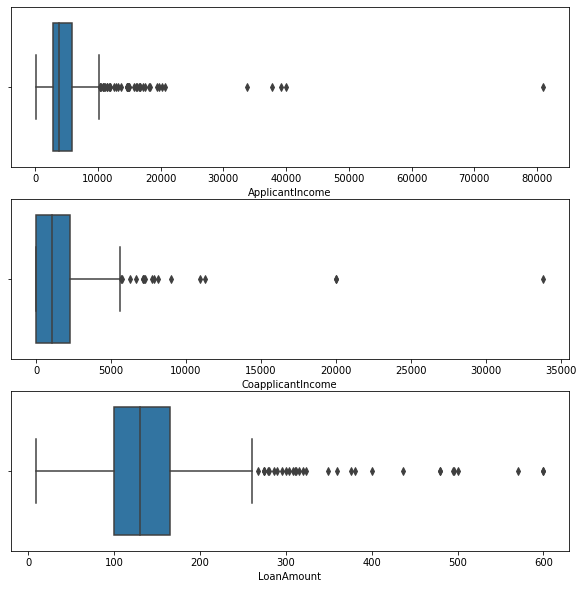

In [48]:
#visulaize outliers 
fig, axes = plt.subplots(3, figsize=(10, 10))

seaborn.boxplot(data=dataset_clean, x='ApplicantIncome', ax=axes[0])
seaborn.boxplot(data=dataset_clean, x='CoapplicantIncome', ax=axes[1])
seaborn.boxplot(data=dataset_clean, x='LoanAmount', ax=axes[2])

In [49]:
#remove major outliers in dataset
dataset_out = dataset_clean
Q1 = dataset_out.quantile(0.25)
Q3 = dataset_out.quantile(0.75)
IQR = Q3 - Q1

#remove only the largest outliers
df = dataset_out[~((dataset_out < (Q1 - 2 * IQR)) |(dataset_out > (Q3 + 2 * IQR))).any(axis=1)]

print("Before removing outliers:", dataset_out.size)
print("After removing outliers:", df.size)
print("Outliers are ", df.size/dataset_out.size *100, "% of the dataset")

Before removing outliers: 6838
After removing outliers: 2535
Outliers are  37.0722433460076 % of the dataset


<ipython-input-49-f8af344aa95f>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = dataset_out[~((dataset_out < (Q1 - 2 * IQR)) |(dataset_out > (Q3 + 2 * IQR))).any(axis=1)]


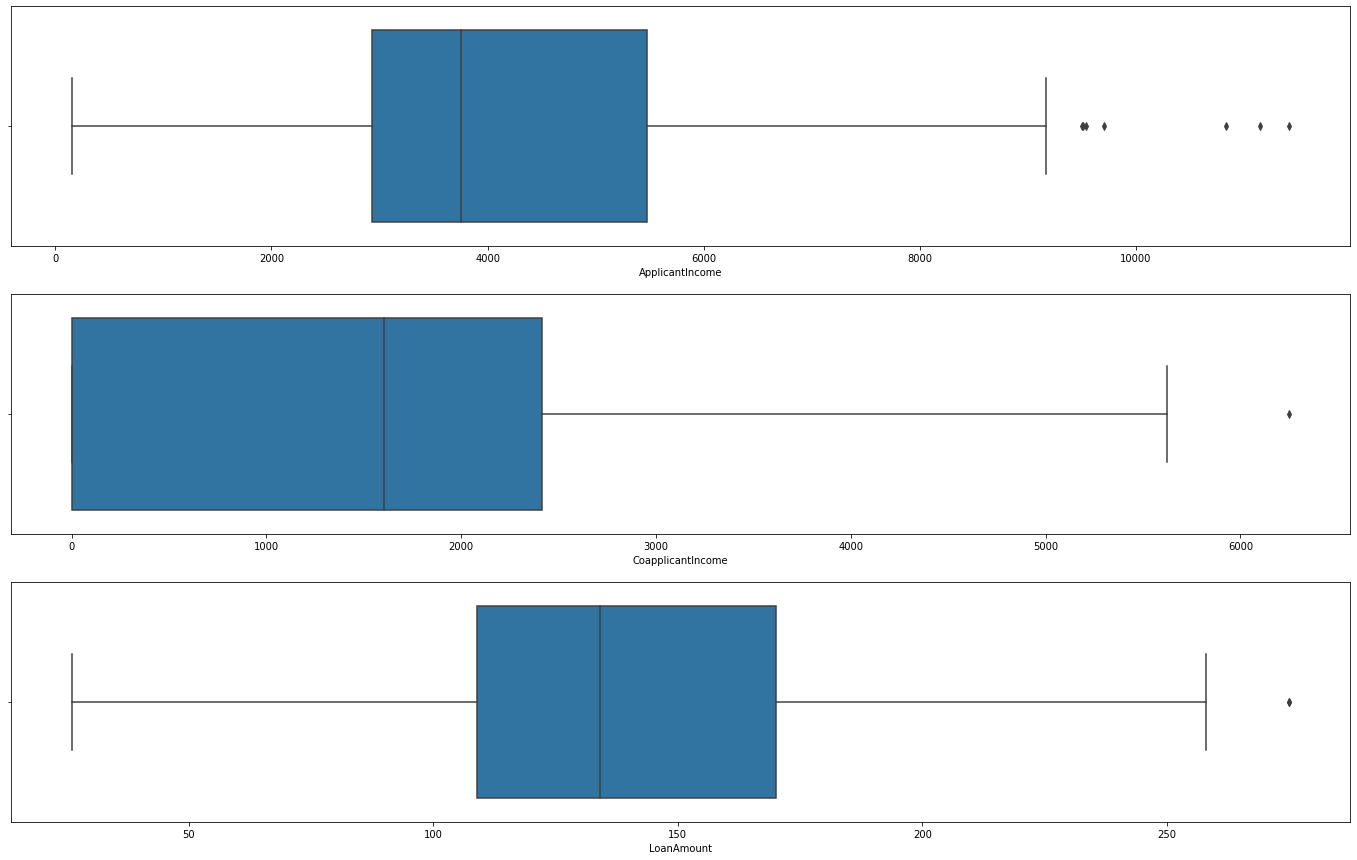

In [50]:
#after removing outliers
fig, axes = plt.subplots(3, figsize=(24, 15))

seaborn.boxplot(data=df, x='ApplicantIncome', ax=axes[0])
seaborn.boxplot(data=df, x='CoapplicantIncome', ax=axes[1])
seaborn.boxplot(data=df, x='LoanAmount', ax=axes[2])

In [51]:
#split features and labels
labels = dataset_clean['Loan_Status']
features = dataset_clean.drop(['Loan_Status', 'Loan_ID'], axis=1)

features

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,0
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,2
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,0
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,0
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,1,0.0,2900,0.0,71.000000,360.0,1.0,2
610,0.0,1.0,3.0,1,0.0,4106,0.0,40.000000,180.0,1.0,2
611,0.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,0
612,0.0,1.0,2.0,1,0.0,7583,0.0,187.000000,360.0,1.0,0


In [52]:
from imblearn.over_sampling import RandomOverSampler

#check if balanced
occurances = labels.value_counts()

if occurances[1] == occurances[0]:
  print('balanced dataset')

  features_bal = features
  labels_bal = labels
else:
  print('Unbalanced dataset')  
  print(occurances)

  #balance dataset
  over_sampler = RandomOverSampler(random_state=42)
  features_bal, labels_bal = over_sampler.fit_resample(features, labels)

  print("\nAchive balance via oversampling")
  
print(labels_bal.value_counts())

Unbalanced dataset
1    356
0    170
Name: Loan_Status, dtype: int64

Achive balance via oversampling
1    356
0    356
Name: Loan_Status, dtype: int64


In [53]:
#normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(features_bal)

features_scaled = scaler.transform(features_bal)

# Perfrom Feature Selection

In [62]:
#split into train, test, and val sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features_scaled, labels_bal, test_size=0.2)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(455, 11)
(455,)
(143, 11)
(143,)
(114, 11)
(114,)


In [63]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC

#determine the best features to use

model = SVC()

best_score = 0

for k in range(1,11):
   #get best k number of features
   #best_features = SelectKBest(score_func=f_classif, k=k).fit_transform(train_features_scaled, train_labels)
   train_features_selected = SelectKBest(score_func=f_classif, k=k).fit_transform(X_train, Y_train)

   #determine the score of the model
   model.fit(train_features_selected, Y_train)

   test_features_selected = SelectKBest(score_func=f_classif, k=k).fit_transform(X_test, Y_test)

   score = model.score(test_features_selected, Y_test) 

   #compare score to best score
   if score >= best_score:
     best_score = score
     selected_features_train = train_features_selected
     selected_features_test = test_features_selected
     num_features = k

#get names of best fetures
selector = SelectKBest(score_func=f_classif, k=num_features).fit(features_bal, labels_bal)
feature_names = selector.get_feature_names_out()

#selected_features
print("Best score:", best_score)
print("Best number of features:", num_features)
print("Selected features:", feature_names)

Best score: 0.7972027972027972
Best number of features: 10
Selected features: ['Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History']


# Determine Best Algorithim to Predict the Loan

In [64]:
#model parameter selection
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
best_score = 0

for i in range(len(kernel)):
  #train model with sepecified parameters
  model = SVC(kernel=kernel[i])
  model.fit(selected_features_train, Y_train)

  #deterimine score
  score = model.score(selected_features_test, Y_test) 

  #check if the best score so far
  if score >= best_score:
    best_score = score
    kernel_selected = kernel[i]

print('Best score:', best_score)
print('Selected kernel:', kernel_selected)

Best score: 0.7972027972027972
Selected kernel: rbf


# Train the Model and Predict the Loan

In [65]:
#train model with sepecified parameters
model = SVC(kernel= kernel_selected)
history = model.fit(selected_features_train, Y_train)

In [66]:
#deterimine score
score = model.score(selected_features_test, Y_test) 
print(score)

0.7972027972027972


In [78]:
#predictions

#get selected features from valid


predicted = model.predict(selected_features_test)
print('predicted:')
print(predicted)
print('actual:')
y_test_arr = Y_test.to_numpy()
print(y_test_arr)

num_cor = 0
num_incor = 0

for i in range(len(predicted)):
  if predicted[i] == y_test_arr[i]:
    num_cor = num_cor + 1
  else:
    num_incor = num_incor + 1

print("Number correctly classified:", num_cor)
print("Number incorrectly classified:", num_incor)

predicted:
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0]
actual:
[0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1
 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1
 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0]
Number correctly classified: 114
Number incorrectly classified: 29


In [68]:
#get the selected features not split
selected_feat = features[feature_names]

#re normalize the features
scaler = StandardScaler().fit(selected_feat)
scaled_feat = scaler.transform(selected_feat)

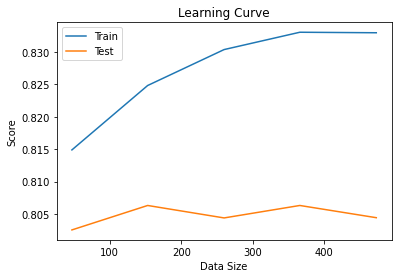

In [86]:
from sklearn.model_selection import learning_curve

#plot learning curve

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, scaled_feat, labels, cv=10,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))
plt.title('Learning Curve')
plt.ylabel('Score')
plt.xlabel('Data Size')
plt.legend(['Train', 'Test'])
plt.show()